# Setup

Import common modules. Ensure that Python and Scikit-Learn in proper versions are used.

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Load Data

In [2]:
DATASET_PATH = "./data"
BERKLEYEARTH_DATASETS = os.path.join(DATASET_PATH, "berkeleyearth")
MONTHLY_ANOMALIES_PATH = os.path.join(BERKLEYEARTH_DATASETS, "Raw_TAVG_complete.txt")
MONTHLY_ANOMALIES_CSV_PATH = os.path.join(BERKLEYEARTH_DATASETS, "Raw_TAVG_complete.csv")

BerkleyEarth's data isn't hosted in csv format. This is a snipped how it looks like

In [3]:
with open(MONTHLY_ANOMALIES_PATH, 'r') as f:
    lines = f.readlines()
    for line in range(45, 50):
        print(lines[line])

%               Monthly    Annual     Five-year  Ten-year   Twenty-year

% Year, Month,  Anomaly,   Anomaly,   Anomaly,   Anomaly,   Anomaly

 

  1750     1     2.166       NaN       NaN       NaN       NaN

  1750     2     0.723     0.751       NaN       NaN       NaN



We wan't to convert it into format that can be understand by pandas library

In [4]:
# we'll use util function that converts raw data into csv
import berkleyearth as be

be.berkleyearth_dataset_to_csv(MONTHLY_ANOMALIES_PATH)

# Quick take a look at the data

In [5]:
import pandas as pd

temperature_anomalies = pd.read_csv(MONTHLY_ANOMALIES_CSV_PATH)

In [6]:
temperature_anomalies

,year,month,monthly_anomaly,annual_anomaly,five_year_anomaly,ten_year_anomaly,twenty_year_anomaly
0,1750,1,2.166,NaN,NaN,NaN,NaN
1,1750,2,0.723,0.751,NaN,NaN,NaN
2,1750,3,-0.398,0.508,NaN,NaN,NaN
3,1750,4,1.988,0.501,NaN,NaN,NaN
4,1750,5,0.129,0.149,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3259,2021,8,1.227,NaN,NaN,NaN,NaN
3260,2021,9,1.306,NaN,NaN,NaN,NaN
3261,2021,10,1.626,NaN,NaN,NaN,NaN
3262,2021,11,1.366,NaN,NaN,NaN,NaN


Becase of the semantic of data
```
For each month, we report the estimated land-surface average for that 
month.  We also report the corresponding values for year, five-year, 
ten-year, and twenty-year moving averages CENTERED about that month 
(rounding down if the center is in between months).  For example, 
the annual average from January to December 1950 is reported at June 1950.
```
We'll be using `annual_anomaly` column in month `June` as a yearly anomaly indicator

In [7]:
anual_anomalies = temperature_anomalies[temperature_anomalies['month'] == 6][['year', 'annual_anomaly', 'ten_year_anomaly']]
anual_anomalies

,year,annual_anomaly,ten_year_anomaly
5,1750,0.183,NaN
17,1751,1.075,NaN
29,1752,NaN,NaN
41,1753,0.104,NaN
53,1754,0.785,NaN
...,...,...,...
3209,2017,1.364,NaN
3221,2018,1.208,NaN
3233,2019,1.395,NaN
3245,2020,1.556,NaN


In [36]:
import altair as alt

annal_anomalies_since_1820 = anual_anomalies[anual_anomalies['year'] >= 1820]

alt.Chart(annal_anomalies_since_1820).mark_line().encode(
    x = alt.X('year'),
    y = alt.Y(alt.repeat('layer'), aggregate = 'mean', title="temperature anomalies"),
    color=alt.ColorDatum(alt.repeat('layer'))
).properties(
    width = 700,
    height = 200
).repeat(layer=['annual_anomaly', 'ten_year_anomaly'])


alt.RepeatChart(...)

# Climate Stripes

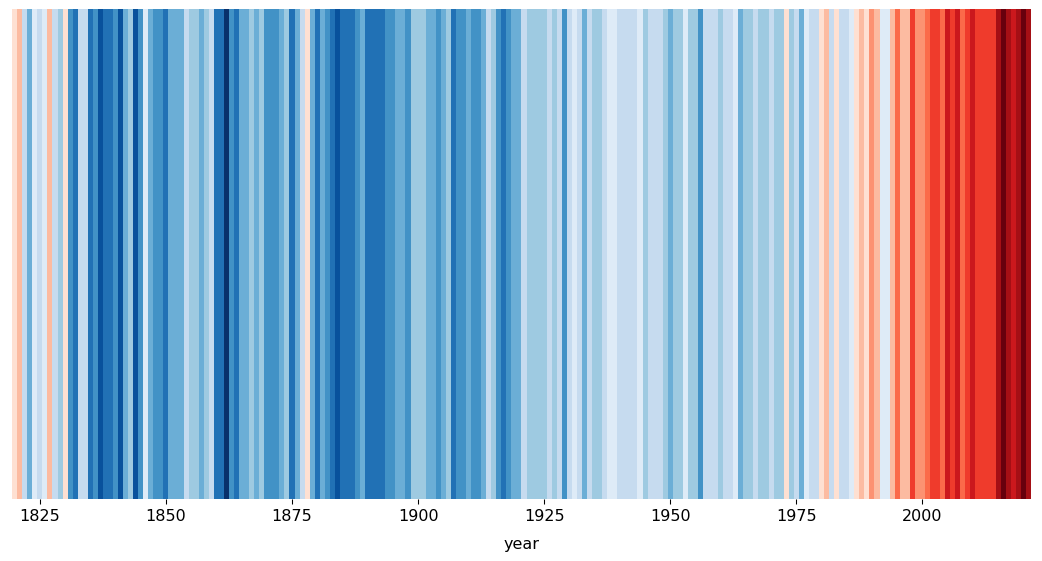

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

df = annal_anomalies_since_1820

fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Colours - Choose the colour map - 8 blues and 8 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d'])

# linearly normalizes data into the [0.0, 1.0] interval
norm = mpl.colors.Normalize(df['annual_anomaly'].min(), df['annual_anomaly'].max())

# Plot bars
bar = ax.bar(df['year'], 1, color=cmap(norm(df['annual_anomaly'])), width=1, zorder=2)

ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

# Reformat x-axis label and tick labels
ax.set_xlabel('year', fontsize=12, labelpad=10)
# ax.set_xticks([])
ax.set_xlim([df['year'].min()-1, df['year'].max()+1])

# Reformat y-axis label and tick labels
ax.set_ylabel('', fontsize=12, labelpad=10)
ax.set_yticks([])
ax.set_ylim([0, 1]) 


# Adjust the margins around the plot area
plt.subplots_adjust(left=0.1, right=None, top=None, bottom=0.2, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')

# CO2 emission globaly per year (move to notebook 1)

In [32]:
OWID_DATASETS = os.path.join(DATASET_PATH, "owid")
CO2_EMISSION_CSV_PATH = os.path.join(OWID_DATASETS, "owid-co2-data.csv")

co2_emission = pd.read_csv(CO2_EMISSION_CSV_PATH)
co2_emission_annually = co2_emission[["year", "co2"]].fillna(0).groupby(['year']).sum().reset_index()
co2_emission_annually

alt.Chart(co2_emission_annually).mark_line().encode(
    x='year',
    y='co2'
)

alt.Chart(...)

# Join anomalies with co2 emission

In [41]:
co2_emission_annually_since_1820 = co2_emission_annually[co2_emission_annually['year'] >= 1820]

anomalies_and_co2_anually = annal_anomalies_since_1820.merge(co2_emission_annually_since_1820, how = 'inner', left_on='year', right_on='year')
anomalies_and_co2_anually

,year,annual_anomaly,ten_year_anomaly,co2
0,1820,0.334,-0.084,302.541
1,1821,0.564,0.005,306.952
2,1822,0.032,0.142,319.057
3,1823,-0.252,0.175,337.495
4,1824,0.232,0.189,349.117
...,...,...,...,...
197,2017,1.364,NaN,234500.508
198,2018,1.208,NaN,238741.382
199,2019,1.395,NaN,239925.740
200,2020,1.556,NaN,228766.484


# Correlation between anomaly and co2 emission

array([[<AxesSubplot: xlabel='annual_anomaly', ylabel='annual_anomaly'>,
        <AxesSubplot: xlabel='co2', ylabel='annual_anomaly'>,
        <AxesSubplot: xlabel='ten_year_anomaly', ylabel='annual_anomaly'>],
       [<AxesSubplot: xlabel='annual_anomaly', ylabel='co2'>,
        <AxesSubplot: xlabel='co2', ylabel='co2'>,
        <AxesSubplot: xlabel='ten_year_anomaly', ylabel='co2'>],
       [<AxesSubplot: xlabel='annual_anomaly', ylabel='ten_year_anomaly'>,
        <AxesSubplot: xlabel='co2', ylabel='ten_year_anomaly'>,
        <AxesSubplot: xlabel='ten_year_anomaly', ylabel='ten_year_anomaly'>]],
      dtype=object)

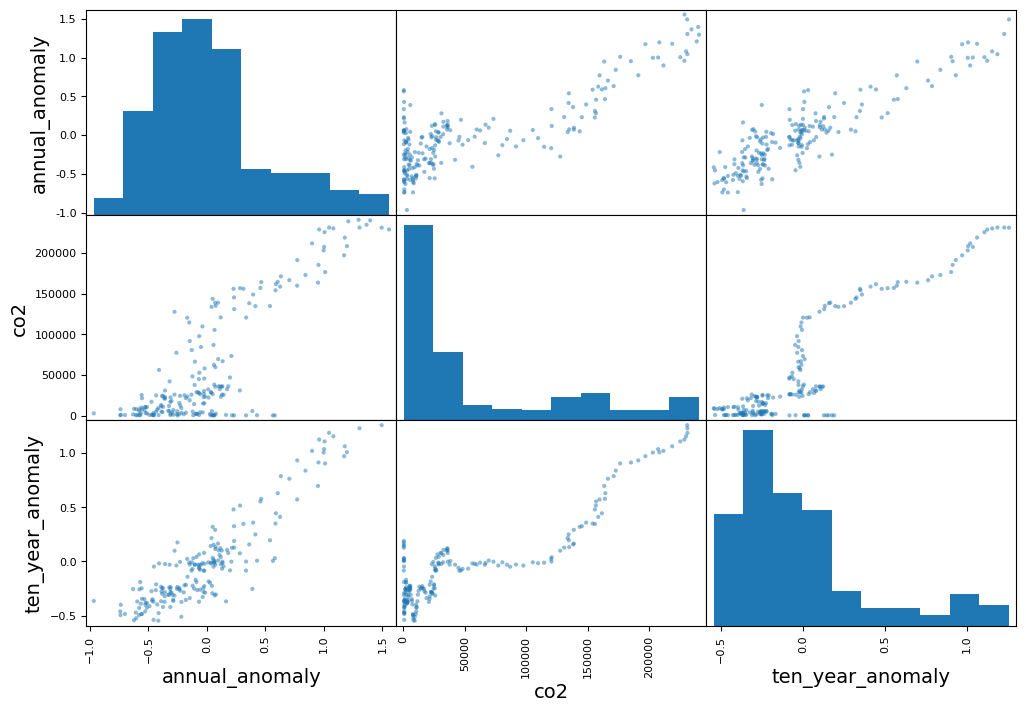

In [43]:
from pandas.plotting import scatter_matrix

attributes = ['annual_anomaly', "co2", 'ten_year_anomaly']
scatter_matrix(anomalies_and_co2_anually[attributes], figsize=(12,8))

In [45]:
anomalies_and_co2_anually.corr()

,year,annual_anomaly,ten_year_anomaly,co2
year,1.000000,0.685890,0.746745,0.882762
annual_anomaly,0.685890,1.000000,0.906704,0.836270
ten_year_anomaly,0.746745,0.906704,1.000000,0.903795
co2,0.882762,0.836270,0.903795,1.000000
